<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-description" data-toc-modified-id="Data-description-1">Data description</a></span></li><li><span><a href="#Data-Preprocessing" data-toc-modified-id="Data-Preprocessing-2">Data Preprocessing</a></span><ul class="toc-item"><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-2.1">Conclusion</a></span></li></ul></li><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-3">Exploratory Data Analysis</a></span><ul class="toc-item"><li><span><a href="#Trend" data-toc-modified-id="Trend-3.1">Trend</a></span></li><li><span><a href="#Seasonality" data-toc-modified-id="Seasonality-3.2">Seasonality</a></span></li><li><span><a href="#Residuals" data-toc-modified-id="Residuals-3.3">Residuals</a></span></li></ul></li><li><span><a href="#Training" data-toc-modified-id="Training-4">Training</a></span><ul class="toc-item"><li><span><a href="#Feature-Engineering" data-toc-modified-id="Feature-Engineering-4.1">Feature Engineering</a></span></li><li><span><a href="#Hyperparameter-Tuning" data-toc-modified-id="Hyperparameter-Tuning-4.2">Hyperparameter Tuning</a></span><ul class="toc-item"><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-4.2.1">Random Forest</a></span></li><li><span><a href="#XGBRegressor" data-toc-modified-id="XGBRegressor-4.2.2">XGBRegressor</a></span></li><li><span><a href="#LGBMRegressor" data-toc-modified-id="LGBMRegressor-4.2.3">LGBMRegressor</a></span></li><li><span><a href="#CatBoostRegressor" data-toc-modified-id="CatBoostRegressor-4.2.4">CatBoostRegressor</a></span></li><li><span><a href="#KNearest-Neighbors" data-toc-modified-id="KNearest-Neighbors-4.2.5">KNearest Neighbors</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-4.3">Conclusion</a></span></li></ul></li><li><span><a href="#Testing" data-toc-modified-id="Testing-5">Testing</a></span><ul class="toc-item"><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-5.1">Conclusion</a></span></li></ul></li></ul></div>

# Project description

Sweet Lift Taxi company has collected historical data on taxi orders at airports. To attract more drivers during peak hours, we need to predict the amount of taxi orders for the next hour. Build a model for such a prediction.

The RMSE metric on the test set should not be more than 48.


## Data description

The data is stored in file `taxi.csv`. The number of orders is in the '*num_orders*' column.

In [2]:
# import pandas and numpy for data preprocessing and manipulation
import numpy as np
import pandas as pd


# matplotlib and seaborn for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# import module for splitting and cross-validation using gridsearch
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

# import metric to measure quality of model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_absolute_error

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler 

# import time series split
from sklearn.model_selection import TimeSeriesSplit


# import statistics models
from statsmodels.tsa.seasonal import seasonal_decompose

# import machine learning models
from sklearn.linear_model import LinearRegression # import linear regression algorithm
from sklearn.ensemble import RandomForestRegressor # import random forest algorithm
from catboost import CatBoostRegressor, Pool # import catboost regressor
from lightgbm import LGBMRegressor # import lightgbm regressor
from xgboost import XGBRegressor # import xgboost regressor
from sklearn.neighbors import KNeighborsRegressor 

# ignore warnings
import warnings
warnings.filterwarnings("ignore")



## Data Preprocessing

In [3]:
# read the data
df = pd.read_csv('https://code.s3.yandex.net/datasets/taxi.csv',index_col=[0], parse_dates=[0])


In [4]:
# function to determine if columns in file have null values
def get_percent_of_na(df,num):
    df_nulls = pd.DataFrame(df.isna().sum(),columns=['Missing Values'])
    df_nulls['Percent of Nulls'] = round(df_nulls['Missing Values'] / df.shape[0],num) *100
    return df_nulls
        
# function to display general information about the dataset
def get_info(df):
    """
    This function uses the head(), info(), describe(), shape() and duplicated() 
    methods to display the general information about the dataset.
    """
    print("\033[1m" + '-'*100 + "\033[0m")
    print('Head:')
    print()
    display(df.head())
    print('-'*100)
    print('Info:')
    print()
    display(df.info())
    print('-'*100)
    print('Describe:')
    print()
    display(df.describe())
    print('-'*100)
    display(df.describe)
    print()
    print('Columns with nulls:')
    display(get_percent_of_na(df, 4))  # check this out
    print('-'*100)
    print('Shape:')
    print(df.shape)
    print('-'*100)
    print('Duplicated:')
    print("\033[1m" + 'We have {} duplicated rows.\n'.format(df.duplicated().sum()) + "\033[0m")
    print()

In [5]:
# study the general information about the dataset 
print('General information about the dataframe')
get_info(df)

General information about the dataframe
----------------------------------------------------------------------------------------------------
Head:



,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32


----------------------------------------------------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


None

----------------------------------------------------------------------------------------------------
Describe:



,num_orders
count,26496.000000
mean,14.070463
std,9.211330
min,0.000000
25%,8.000000
50%,13.000000
75%,19.000000
max,119.000000


----------------------------------------------------------------------------------------------------


<bound method NDFrame.describe of                      num_orders
datetime                       
2018-03-01 00:00:00           9
2018-03-01 00:10:00          14
2018-03-01 00:20:00          28
2018-03-01 00:30:00          20
2018-03-01 00:40:00          32
...                         ...
2018-08-31 23:10:00          32
2018-08-31 23:20:00          24
2018-08-31 23:30:00          27
2018-08-31 23:40:00          39
2018-08-31 23:50:00          53

[26496 rows x 1 columns]>


Columns with nulls:


,Missing Values,Percent of Nulls
num_orders,0,0.0


----------------------------------------------------------------------------------------------------
Shape:
(26496, 1)
----------------------------------------------------------------------------------------------------
Duplicated:
We have 26415 duplicated rows.




In [6]:
df['num_orders'] = df['num_orders'].astype('int32')

df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int32
dtypes: int32(1)
memory usage: 310.5 KB


In [7]:


# display index
df.index

DatetimeIndex(['2018-03-01 00:00:00', '2018-03-01 00:10:00',
               '2018-03-01 00:20:00', '2018-03-01 00:30:00',
               '2018-03-01 00:40:00', '2018-03-01 00:50:00',
               '2018-03-01 01:00:00', '2018-03-01 01:10:00',
               '2018-03-01 01:20:00', '2018-03-01 01:30:00',
               ...
               '2018-08-31 22:20:00', '2018-08-31 22:30:00',
               '2018-08-31 22:40:00', '2018-08-31 22:50:00',
               '2018-08-31 23:00:00', '2018-08-31 23:10:00',
               '2018-08-31 23:20:00', '2018-08-31 23:30:00',
               '2018-08-31 23:40:00', '2018-08-31 23:50:00'],
              dtype='datetime64[ns]', name='datetime', length=26496, freq=None)

In [8]:
# show head of sorted data

df.head()

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32


In [9]:
# check if the dates and times are in chronological order
print(df.index.is_monotonic)
print()
print(df.info())

True

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int32
dtypes: int32(1)
memory usage: 310.5 KB
None


In [10]:
# minimum value of index
print('Minimum timestamp', df.index.min())
print()
# maximum value of index
print('Maximum timestamp', df.index.max())

Minimum timestamp 2018-03-01 00:00:00

Maximum timestamp 2018-08-31 23:50:00


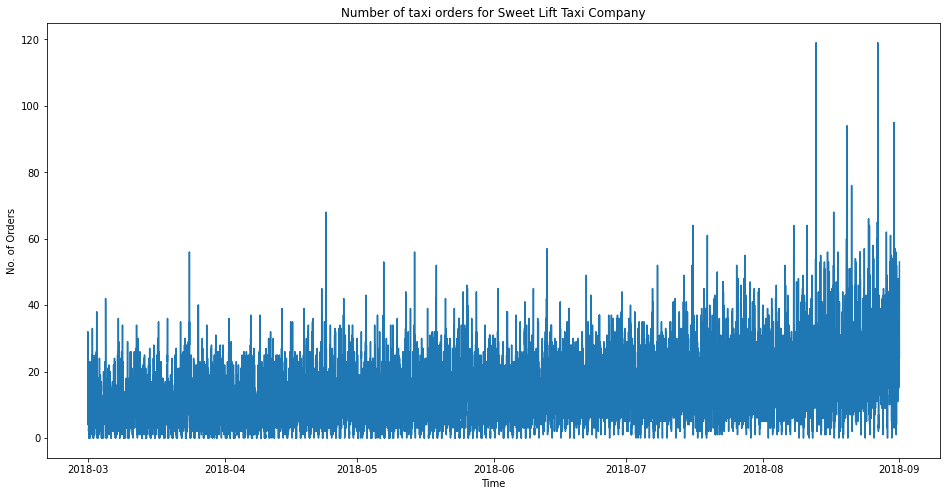

In [11]:
# visualize time series
ts = df['num_orders']
plt.figure(figsize=(16,8))
plt.title('Number of taxi orders for Sweet Lift Taxi Company')
plt.xlabel('Time')
plt.ylabel('No. of Orders')
plt.plot(ts);

The plot above is a time series plot of the number of taxi orders for Sweet Lift Taxi Company between 1st March, 2018 and 31st August, 2018. Looking at the plot, we can see a trend in our data. This means that we can use a time series to model the data and generate forecasts. We can analyze the data using different components of a time series.

### Conclusion

The data consist of 26496 rows and 2 columns. There are no missing values or duplicated rows. The datetime column needs to be converted to the datetime datatype and the num_orders column needs to be converted to int32 in order to reduce memory requirements during computation.



## Exploratory Data Analysis

In [12]:
# resample data by 1 hour
ts = ts.resample('1H').sum()
ts


datetime
2018-03-01 00:00:00    124
2018-03-01 01:00:00     85
2018-03-01 02:00:00     71
2018-03-01 03:00:00     66
2018-03-01 04:00:00     43
                      ... 
2018-08-31 19:00:00    136
2018-08-31 20:00:00    154
2018-08-31 21:00:00    159
2018-08-31 22:00:00    223
2018-08-31 23:00:00    205
Freq: H, Name: num_orders, Length: 4416, dtype: int32

<AxesSubplot:title={'center':'2 weeks plot from 1st-March to 14th-March '}, xlabel='datetime'>

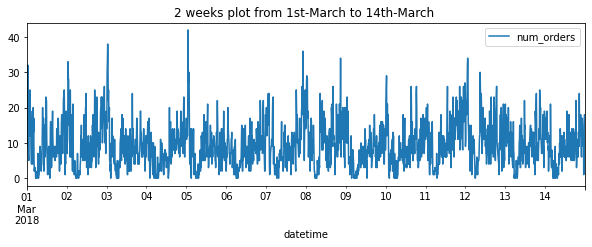

In [13]:

dataWeek = df['2018-03-01':'2018-03-14']
dataWeek.plot(figsize=(10,3),title='2 weeks plot from 1st-March to 14th-March ')



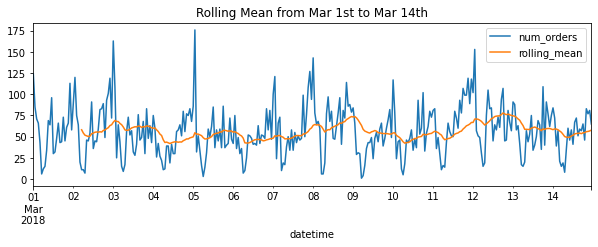

In [14]:
dataWeek = dataWeek.resample('1H').sum()
dataWeek['rolling_mean'] = dataWeek.rolling(30).mean() 
dataWeek.plot(figsize=(10,3),title='Rolling Mean from Mar 1st to Mar 14th');



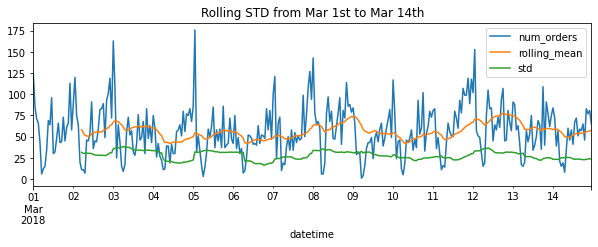

In [15]:
# 
dataWeek['std'] = dataWeek['num_orders'].rolling(30).std() 
dataWeek.plot(figsize=(10,3),title='Rolling STD from Mar 1st to Mar 14th');


### Trend

Text(0.5, 1.0, 'Trend')

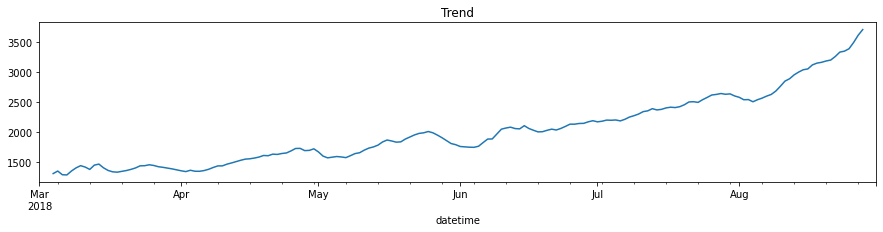

In [16]:
# 
ts_ = ts.resample('1D').sum()

decomposed = seasonal_decompose(ts_)

plt.figure(figsize=(6, 8))
plt.subplot(311)
decomposed.trend.plot(ax=plt.gca(), figsize=(15, 10))
plt.title('Trend')

We observe that the data shows upward trend. Using the trend line, we can make forecast into the future.

### Seasonality

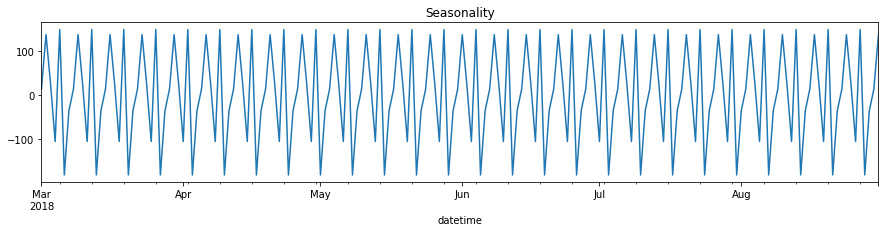

In [17]:
# Seasonality
plt.subplot(312)
decomposed.seasonal.plot(ax=plt.gca(), figsize=(15, 10))
plt.title('Seasonality');

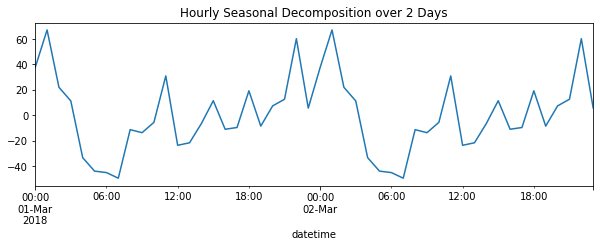

In [23]:
#dataWeek = df['2018-03-01':'2018-03-14']
tmp = dataWeek['2018-03-01':'2018-03-02']

decomposed_hour = seasonal_decompose(tmp['num_orders'].dropna())
decomposed_hour.seasonal.plot(figsize=(10,3), title='Hourly Seasonal Decomposition over 2 Days');


 The plots above shows the periodic fluctuation in the time series within a certain period. These fluctuations form a pattern that tends to repeat from one seasonal period to the next one. The taxi rides start decreasing after midnight.
They start increasing at 6am. They peak around noon, then before midnight.

### Residuals

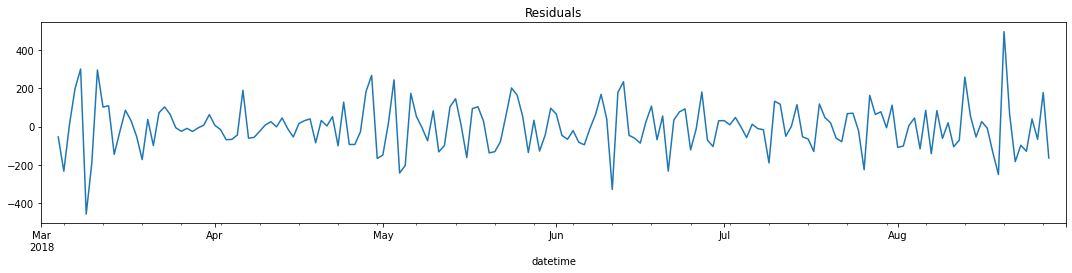

In [37]:
# Residuals
plt.subplot(313)
decomposed.resid.plot(ax=plt.gca(), figsize=(15, 10))
plt.title('Residuals')
plt.tight_layout()

## Training

### Feature Engineering

In [38]:
# function to make new features 
def make_features(data, max_lag, rolling_mean_size):
    data['month'] = data.index.month
    data['day'] = data.index.day
    data['dayofweek'] = data.index.dayofweek
    data['hour'] = data.index.hour
    
    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data['num_orders'].shift(lag)

    data['rolling_mean'] = data['num_orders'].shift().rolling(rolling_mean_size).mean()
# make new features 
ts = pd.DataFrame(ts)
make_features(ts, 6, 7)
ts.head()

,num_orders,month,day,dayofweek,hour,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,rolling_mean
datetime,,,,,,,,,,,,
2018-03-01 00:00:00,124,3,1,3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 01:00:00,85,3,1,3,1,124.0,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 02:00:00,71,3,1,3,2,85.0,124.0,NaN,NaN,NaN,NaN,NaN
2018-03-01 03:00:00,66,3,1,3,3,71.0,85.0,124.0,NaN,NaN,NaN,NaN
2018-03-01 04:00:00,43,3,1,3,4,66.0,71.0,85.0,124.0,NaN,NaN,NaN


In [39]:
# drop NaNs from the time series data
ts = ts.dropna()
print('The time series has', ts.shape[0], 'rows and', ts.shape[1], 'features')
print()
ts.head()

The time series has 4409 rows and 12 features



,num_orders,month,day,dayofweek,hour,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,rolling_mean
datetime,,,,,,,,,,,,
2018-03-01 07:00:00,15,3,1,3,7,12.0,6.0,43.0,66.0,71.0,85.0,58.142857
2018-03-01 08:00:00,34,3,1,3,8,15.0,12.0,6.0,43.0,66.0,71.0,42.571429
2018-03-01 09:00:00,69,3,1,3,9,34.0,15.0,12.0,6.0,43.0,66.0,35.285714
2018-03-01 10:00:00,64,3,1,3,10,69.0,34.0,15.0,12.0,6.0,43.0,35.000000
2018-03-01 11:00:00,96,3,1,3,11,64.0,69.0,34.0,15.0,12.0,6.0,34.714286


In [40]:


# split the data into train and testing sets
train, test = train_test_split(ts, shuffle=False, test_size=0.1)
print(train.index.min(), train.index.max())
print(test.index.min(), test.index.max())
print()

print('The train set has', train.shape[0], 'rows and', train.shape[1], 'features')
print('The test set has', test.shape[0], 'rows and', test.shape[1], 'features')

2018-03-01 07:00:00 2018-08-13 14:00:00
2018-08-13 15:00:00 2018-08-31 23:00:00

The train set has 3968 rows and 12 features
The test set has 441 rows and 12 features


In [41]:
# declare variables for target and features
features_train = train.drop(['num_orders'], axis=1)
target_train = train['num_orders']

features_test = test.drop(['num_orders'], axis=1)
target_test = test['num_orders']

In [42]:
# time series split
tscv = TimeSeriesSplit(n_splits=5)
print(tscv)

TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)


In [43]:
%%time
model = LinearRegression()
model.fit(features_train, target_train)
predictions_test = model.predict(features_test)
predictions_train = model.predict(features_train)
print("MAE for the training set:", mean_absolute_error(predictions_train, target_train))
print("MAE for the test set: ", mean_absolute_error(predictions_test, target_test))
print('Model RMSE for the training set:', mean_squared_error(predictions_train, target_train,squared=False))
print('Model RMSE for the test set:', mean_squared_error(predictions_test, target_test,squared=False))


MAE for the training set: 23.417383579328074
MAE for the test set:  40.109134647348796
Model RMSE for the training set: 30.418258852998378
Model RMSE for the test set: 52.73988481092025
CPU times: user 9.54 ms, sys: 3.72 ms, total: 13.3 ms
Wall time: 11.9 ms


In [44]:
### Creating pipelines.

pipe_rfr = Pipeline([('scaler1', StandardScaler()),
                    ('RandomForestRegressor', RandomForestRegressor(n_estimators=100))])

pipe_linear = Pipeline([('scaler2', StandardScaler()),
                       ('LinearRegression(Dummy)', LinearRegression())])

pipe_cat_boost_r = Pipeline([('scaler3', StandardScaler()),
                       ('CatBoostRegressor', CatBoostRegressor(verbose=500))])

pipe_lgbm_r =  Pipeline([('scaler4', StandardScaler()),
                       ('LGBMRegressor', LGBMRegressor())])

pipe_xgb_r = Pipeline([('scaler5', StandardScaler()),
                       ('XGBRegressor', XGBRegressor())])
pipe_neighbors = Pipeline([('scaler6',StandardScaler()),('KNeighborsRegressor',KNeighborsRegressor())])

In [45]:
#Creating list of pipelines.
pipelines = [pipe_rfr, pipe_linear, pipe_cat_boost_r, pipe_lgbm_r, pipe_xgb_r,pipe_neighbors]
#Creating a dictionary of pipelines.
pipe_dict = {pipe_rfr:'RandomForestRegressor', pipe_linear:'LinearRegression',\
             pipe_cat_boost_r: 'CatBoostRegressor', pipe_lgbm_r: 'LGBMRegressor', pipe_xgb_r:'XGBRegressor',pipe_neighbors:'KNeighborsRegressor'}






In [46]:
%%time
for pipe in pipelines:
    print(pipe_dict[pipe])
    print(cross_val_score(pipe, features_train, target_train, scoring='neg_root_mean_squared_error', cv=tscv))
    print()
    

RandomForestRegressor
[-23.39622518 -23.34536717 -23.38353794 -24.96755182 -31.6310309 ]

LinearRegression
[-27.40704795 -28.98671583 -30.35214718 -31.91257396 -39.27776214]

CatBoostRegressor
Learning rate set to 0.038369
0:	learn: 29.0042523	total: 50.1ms	remaining: 50.1s
500:	learn: 8.5941305	total: 475ms	remaining: 473ms
999:	learn: 4.6796891	total: 992ms	remaining: 0us
Learning rate set to 0.042799
0:	learn: 29.8091410	total: 1.46ms	remaining: 1.45s
500:	learn: 10.9417646	total: 478ms	remaining: 476ms
999:	learn: 6.9671363	total: 995ms	remaining: 0us
Learning rate set to 0.045627
0:	learn: 31.3020540	total: 1.46ms	remaining: 1.46s
500:	learn: 12.6772237	total: 554ms	remaining: 551ms
999:	learn: 8.8787957	total: 1.16s	remaining: 0us
Learning rate set to 0.047747
0:	learn: 32.6166261	total: 1.54ms	remaining: 1.54s
500:	learn: 13.9063436	total: 618ms	remaining: 615ms
999:	learn: 10.3580295	total: 1.24s	remaining: 0us
Learning rate set to 0.04946
0:	learn: 33.9384215	total: 1.61ms	rem

### Hyperparameter Tuning

#### Random Forest

In [47]:
%%time
# Creating a tree based model with best hyperparameters.
rfr_param = {'n_estimators': (10, 25, 50, 100),
              'max_depth': (None, 2, 4, 8, 10, 12),
              } 

# Creating a grid model.
RF_grid = GridSearchCV(RandomForestRegressor(random_state=0, criterion='mse'), param_grid=rfr_param, 
                       cv=tscv, scoring='neg_root_mean_squared_error', n_jobs=-1)
RF_grid_model = RF_grid.fit(features_train, target_train)
print(RF_grid_model.best_estimator_)
print(RF_grid_model.best_score_)





RandomForestRegressor(random_state=0)
-25.363679873929755
CPU times: user 31 s, sys: 29.6 ms, total: 31.1 s
Wall time: 31.2 s


In [48]:
print('The best hyperparameters are: {}'.format(RF_grid_model.best_params_))


The best hyperparameters are: {'max_depth': None, 'n_estimators': 100}


#### XGBRegressor

In [49]:
%%time

# Creating a gradient boosting descent model with best hyperparameters.
warnings.simplefilter(action='ignore', category=FutureWarning)

xgb_param = {'learning_rate': (0.001, 0.01, 0.1, 0.3),
              'n_estimators': (10, 25, 50, 100),
              'base_score': (0.25, 0.5, 0.75)
              } 

# Creating a grid model.
XGB_grid = GridSearchCV(XGBRegressor(), param_grid=xgb_param, cv=tscv, scoring='neg_root_mean_squared_error', n_jobs=-1) 
XGB_grid_model = XGB_grid.fit(features_train, target_train)
print(XGB_grid_model.best_estimator_)
print(XGB_grid_model.best_score_)

XGBRegressor(base_score=0.75, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=2,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)
-26.153996256285915
CPU times: user 1min 10s, sys: 283 ms, total: 1min 10s
Wall time: 1min 11s


In [50]:
print('The best hyperparameters are: {}'.format(XGB_grid_model.best_params_))


The best hyperparameters are: {'base_score': 0.75, 'learning_rate': 0.1, 'n_estimators': 100}


#### LGBMRegressor

In [51]:
%%time

# Creating a gradient boosting descent model tuning best hyperparameters.
lgbm_param = {'learning_rate': (0.001, 0.01, 0.05, 0.1),
              'n_estimators': (50, 100,200,500),
             'num_leaves': [5, 10, 20, 31]
             } 

# Creating a grid model.
LGBM_grid = GridSearchCV(LGBMRegressor(), param_grid=lgbm_param, cv=tscv, scoring='neg_root_mean_squared_error', n_jobs=1) 
LGBM_grid_model = LGBM_grid.fit(features_train, target_train)
print(LGBM_grid_model.best_estimator_)
print(LGBM_grid_model.best_score_)

LGBMRegressor(learning_rate=0.01, n_estimators=500)
-25.177512749687505
CPU times: user 54.7 s, sys: 1.36 s, total: 56.1 s
Wall time: 56.8 s


In [52]:
print('The best hyperparameters are: {}'.format(LGBM_grid_model.best_params_))


The best hyperparameters are: {'learning_rate': 0.01, 'n_estimators': 500, 'num_leaves': 31}


####  CatBoostRegressor

In [53]:
%%time

# Creating a gradient boosting descent model tuning best hyperparameters.
cat_param = {'learning_rate': [0.001, 0.01, 0.5],
        'depth': [4, 6, 10]
             
       }

# Creating a grid model.
cat_grid = GridSearchCV(CatBoostRegressor(), param_grid=cat_param, cv=tscv, scoring='neg_root_mean_squared_error', n_jobs=1) 
cat_grid_model = cat_grid.fit(features_train, target_train)
print(cat_grid_model.best_estimator_)
print(cat_grid_model.best_score_)

0:	learn: 29.5136997	total: 526us	remaining: 526ms
1:	learn: 29.5014637	total: 952us	remaining: 475ms
2:	learn: 29.4874462	total: 1.42ms	remaining: 472ms
3:	learn: 29.4753584	total: 1.86ms	remaining: 464ms
4:	learn: 29.4636813	total: 2.29ms	remaining: 457ms
5:	learn: 29.4495744	total: 2.74ms	remaining: 454ms
6:	learn: 29.4344856	total: 3.13ms	remaining: 445ms
7:	learn: 29.4205371	total: 3.53ms	remaining: 438ms
8:	learn: 29.4074542	total: 3.92ms	remaining: 432ms
9:	learn: 29.3933881	total: 4.32ms	remaining: 427ms
10:	learn: 29.3860660	total: 4.71ms	remaining: 424ms
11:	learn: 29.3728937	total: 5.1ms	remaining: 420ms
12:	learn: 29.3635818	total: 5.47ms	remaining: 416ms
13:	learn: 29.3498536	total: 5.87ms	remaining: 413ms
14:	learn: 29.3428416	total: 6.27ms	remaining: 412ms
15:	learn: 29.3295428	total: 6.68ms	remaining: 411ms
16:	learn: 29.3169095	total: 7.09ms	remaining: 410ms
17:	learn: 29.3045945	total: 7.49ms	remaining: 409ms
18:	learn: 29.2905229	total: 7.89ms	remaining: 407ms
19:	le

In [54]:
print('The best hyperparameters are: {}'.format(cat_grid_model.best_params_))


The best hyperparameters are: {'depth': 6, 'learning_rate': 0.01}


#### KNearest Neighbors

In [55]:
%%time
knn_param = {'n_neighbors' : range(1,5,1),
            'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']}

# Creating a grid model.
knn_grid = GridSearchCV(KNeighborsRegressor(), param_grid=knn_param, cv=tscv, scoring='neg_root_mean_squared_error', n_jobs=1) 
knn_grid_model = knn_grid.fit(features_train, target_train)
print(knn_grid_model.best_estimator_)
print(knn_grid_model.best_score_)

KNeighborsRegressor(n_neighbors=4)
-33.47088780084256
CPU times: user 1.29 s, sys: 338 ms, total: 1.63 s
Wall time: 1.61 s


In [56]:
print('The best hyperparameters are: {}'.format(knn_grid_model.best_params_))


The best hyperparameters are: {'algorithm': 'auto', 'n_neighbors': 4}


### Conclusion

In this section, several different algorithms with various hyperparameters were trained.  observed the time it took to tune hyperparameters, train time and the model prediction time. The metric used to evaluate the model is the RMSE score. The KNeighbors regression algorithm had the fastest training time but had the worst RMSE score of -33.3. The LightGBM regressor had the best RMSE score of 23.64 and will be chosen for model testing for this task.


## Testing

In [57]:
# LinearRegression Dummy
dummy_test_model = Pipeline([('scaler0', StandardScaler()),
                       ('LinearRegression(Dummy)', LinearRegression())])
dummy_test_model.fit(features_train, target_train)
dummy_predictions_test = dummy_test_model.predict(features_test)
print('Model RMSE for the test set:', mean_squared_error(dummy_predictions_test, target_test,squared=False))
      
      
      

Model RMSE for the test set: 52.73988481092028


In [58]:
# LGBM
lgbm_test_model = Pipeline([('scaler2', StandardScaler()),
        ('LGBMRegressor', LGBMRegressor(learning_rate= 0.1, n_estimators= 200, num_leaves= 10))])
lgbm_test_model.fit(features_train, target_train)
lgbm_predictions_test = lgbm_test_model.predict(features_test)
print('Model RMSE for the test set:', mean_squared_error(lgbm_predictions_test, target_test,squared=False))

Model RMSE for the test set: 44.07994136293336


### Conclusion

The model with the best RMSE score was chosen for model testing for this task. Using the LightGBM algorithm, we obtained an RMSE score of 44.08 for the test set. 